In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statistics
import math

In [2]:
df = pd.read_csv("CAR DETAILS.csv")
df.head(5)     # Top 5 rows

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
"""#### **Checking the datatypes of the columns**"""

# Checking the datatypes of the columns
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [4]:
# Checking the shape of the dataset

# Checking the shape of the dataset
df.shape #rows=8 coloumns=4340


(4340, 8)

In [5]:
# Checking the Column Names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [6]:
#Checking the Null values (Data Cleaning)

# Checking the Null values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
#Checking the duplicate values (Data Cleaning)


df.duplicated().sum()

763

In [8]:
# Description of the numerical columns
df.describe()


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [9]:
# Description of all the columns
df.describe(include = "all")


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [10]:
# Short Information of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [11]:

#Unique Values of Categorical Data

print('Categorical Data: ')

print('Fuel unique values: ', df['fuel'].unique())
print('Number of unique values: ', df['fuel'].unique().size)

print('Seller type unique values: ', df['seller_type'].unique())
print('Number of unique values: ', df['seller_type'].unique().size)

print('Transmission unique values: ', df['transmission'].unique())
print('Number of unique values: ', df['transmission'].unique().size)

print('Owner unique values: ', df['owner'].unique())
print('Number of unique values: ', df['owner'].unique().size)


Categorical Data: 
Fuel unique values:  ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
Number of unique values:  5
Seller type unique values:  ['Individual' 'Dealer' 'Trustmark Dealer']
Number of unique values:  3
Transmission unique values:  ['Manual' 'Automatic']
Number of unique values:  2
Owner unique values:  ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
Number of unique values:  5


In [12]:
# Unique number of Cars
df["name"].nunique()

1491

In [13]:

#Feature Engineering (Data Preprocessing)

#### **Splitting the Car Maker and Car Model from name columns**


name = df["name"].str.split(" ", expand = True)
df["car_maker"] = name[0]
df["car_model"] = name[1]

print("Data after splitting car names")
df.head()


Data after splitting car names


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_maker,car_model
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze


In [14]:
# Adding the current year in dataset

df["current_year"] = 2023

df["no_of_total_years"] = df["current_year"]-df["year"]
df.drop(["current_year"], axis = 1, inplace = True)
df.head()

df.drop(["name"], inplace = True, axis = 1)
df.head()


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_maker,car_model,no_of_total_years
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800,16
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon,16
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna,11
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO,6
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze,9


In [15]:
# Extract Categorical Columns and Numerical Columns

cat_col = df.select_dtypes(include = "object").columns
print("Categorical Columns:",cat_col)
num_col = df.select_dtypes(exclude = "object").columns
print("Numerical Columns:",num_col)


Categorical Columns: Index(['fuel', 'seller_type', 'transmission', 'owner', 'car_maker',
       'car_model'],
      dtype='object')
Numerical Columns: Index(['year', 'selling_price', 'km_driven', 'no_of_total_years'], dtype='object')


In [16]:
# Uni-Variate EDA

# Value Counts of Categorical Columns
a2 = df["fuel"].value_counts()
a3 = df["seller_type"].value_counts()
a4 = df["transmission"].value_counts()
a5 = df["owner"].value_counts()
a6 = df["car_maker"].value_counts()
a7 = df["car_model"].value_counts()

print('Fuel unique values:\n', a2,"\n")
print('Seller type unique values:\n', a3,"\n")
print('Transmission unique values:\n', a4,"\n")
print('Owner unique values:\n', a5,"\n")
print('Car Maker unique values:\n', a6,"\n")
print('Car Model unique values:\n', a7,"\n")


Fuel unique values:
 fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64 

Seller type unique values:
 seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64 

Transmission unique values:
 transmission
Manual       3892
Automatic     448
Name: count, dtype: int64 

Owner unique values:
 owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64 

Car Maker unique values:
 car_maker
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
J

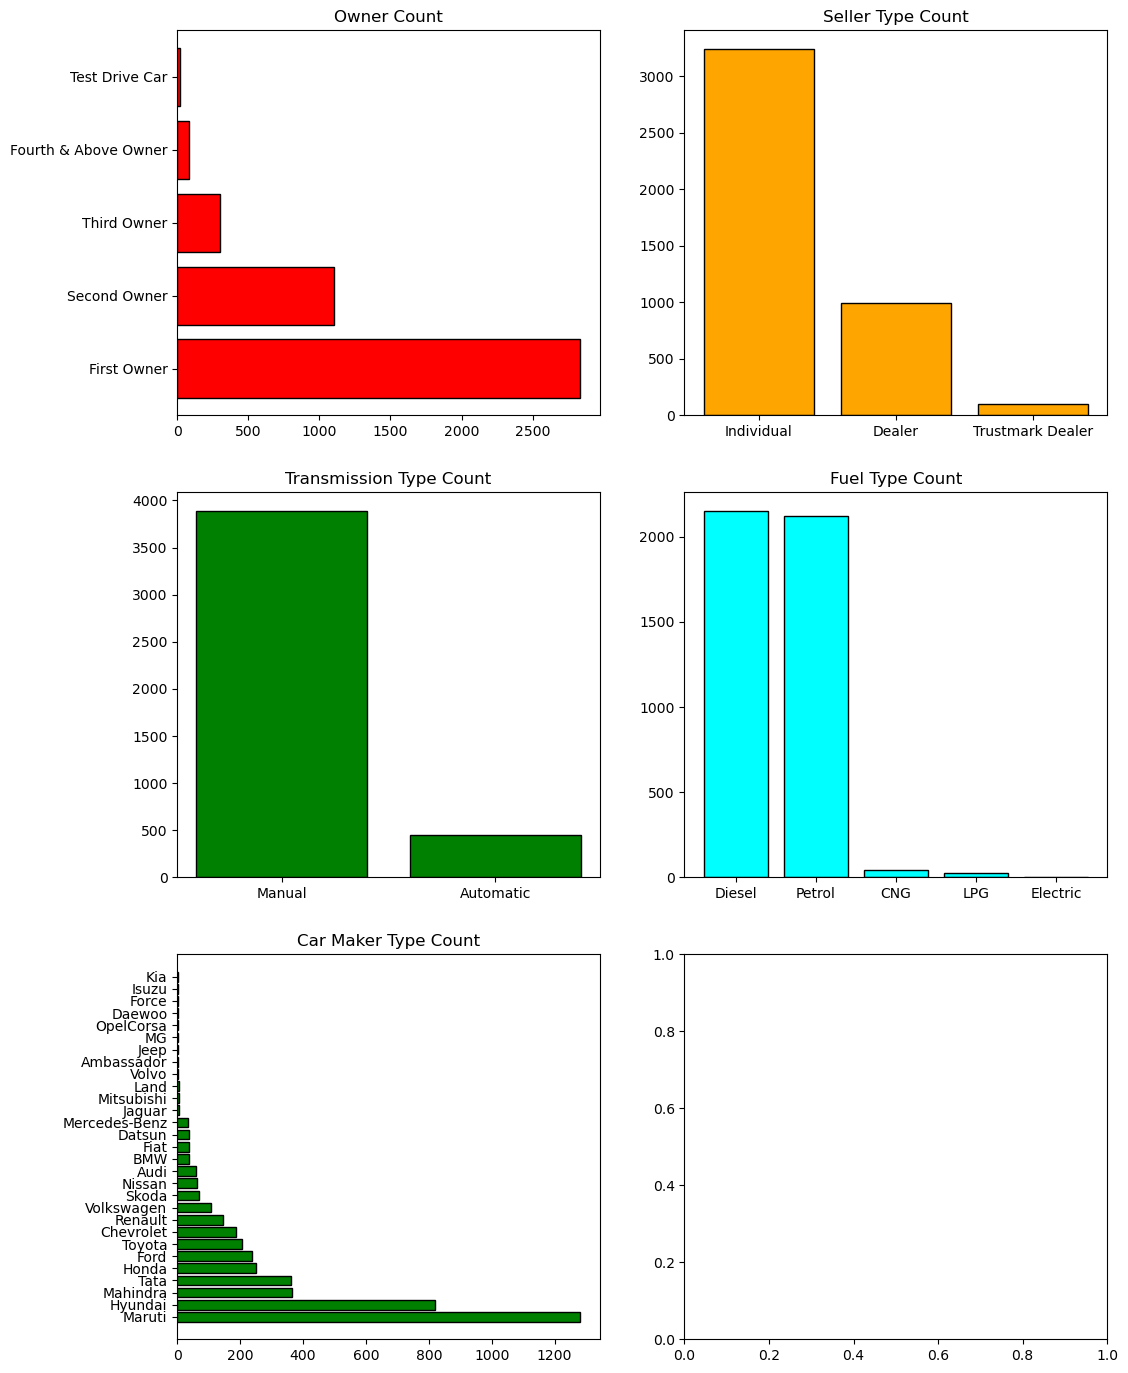

In [17]:
#Value Count Plot of Categorical Columns

figure, axis = plt.subplots(3,2, figsize = (12,17))

axis[0,0].barh(a5.index, a5.values, color = "red", edgecolor = "Black")
axis[0,0].legend
axis[0,0].set_title("Owner Count")

axis[0,1].bar(a3.index, a3.values, color = "orange", edgecolor = "Black")
axis[0,1].legend
axis[0,1].set_title("Seller Type Count")

axis[1,0].bar(a4.index, a4.values, color = "green", edgecolor = "Black")
axis[1,0].legend
axis[1,0].set_title("Transmission Type Count")

axis[1,1].bar(a2.index, a2.values, color = "cyan", edgecolor = "Black")
axis[1,1].legend
axis[1,1].set_title("Fuel Type Count")

axis[2,0].barh(a6.index, a6.values, color = "green", edgecolor = "Black")
axis[2,0].legend
axis[2,0].set_title("Car Maker Type Count")

plt.show()


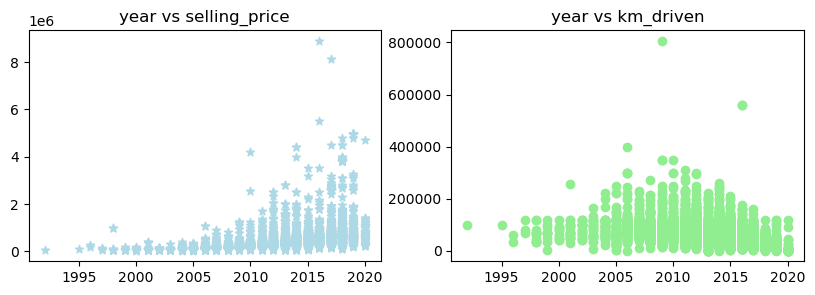

In [18]:
# Bi-Variate EDA

# Scatter plots of numerical columns


# Checking the column names
df.columns

figure, (ax1, ax2) = plt.subplots(1,2, figsize = (10,3))

ax1.scatter(df.year, df["selling_price"], color = "lightblue", marker = "*")
ax1.set_title("year vs selling_price")

ax2.scatter(df.year, df["km_driven"], color = "lightgreen", marker = "o")
ax2.set_title("year vs km_driven")

plt.show()

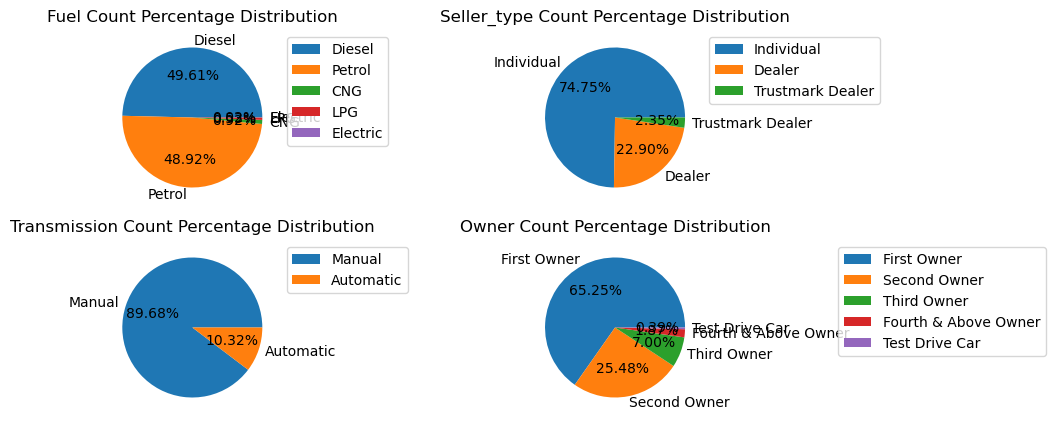

In [19]:

# Pie Chart of Numerical Columns

# Checking the categorical column names
cat_col

figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (10,5))

ax1.pie(a2.values, labels = a2.index, autopct = "%.2f%%")
ax1.legend(bbox_to_anchor = (1,1,0.4,0))
ax1.set_title("Fuel Count Percentage Distribution")

ax2.pie(a3.values, labels = a3.index, autopct = "%.2f%%")
ax2.legend(bbox_to_anchor = (1,1,0.4,0))
ax2.set_title("Seller_type Count Percentage Distribution")

ax3.pie(a4.values, labels = a4.index, autopct = "%.2f%%")
ax3.legend(bbox_to_anchor = (1,1,0.4,0))
ax3.set_title("Transmission Count Percentage Distribution")

ax4.pie(a5.values, labels = a5.index, autopct = "%.2f%%")
ax4.legend(bbox_to_anchor = (1,1,2,0))
ax4.set_title("Owner Count Percentage Distribution")

plt.show()


Index(['fuel', 'seller_type', 'transmission', 'owner', 'car_maker',
       'car_model'],
      dtype='object')
Index(['year', 'selling_price', 'km_driven', 'no_of_total_years'], dtype='object')


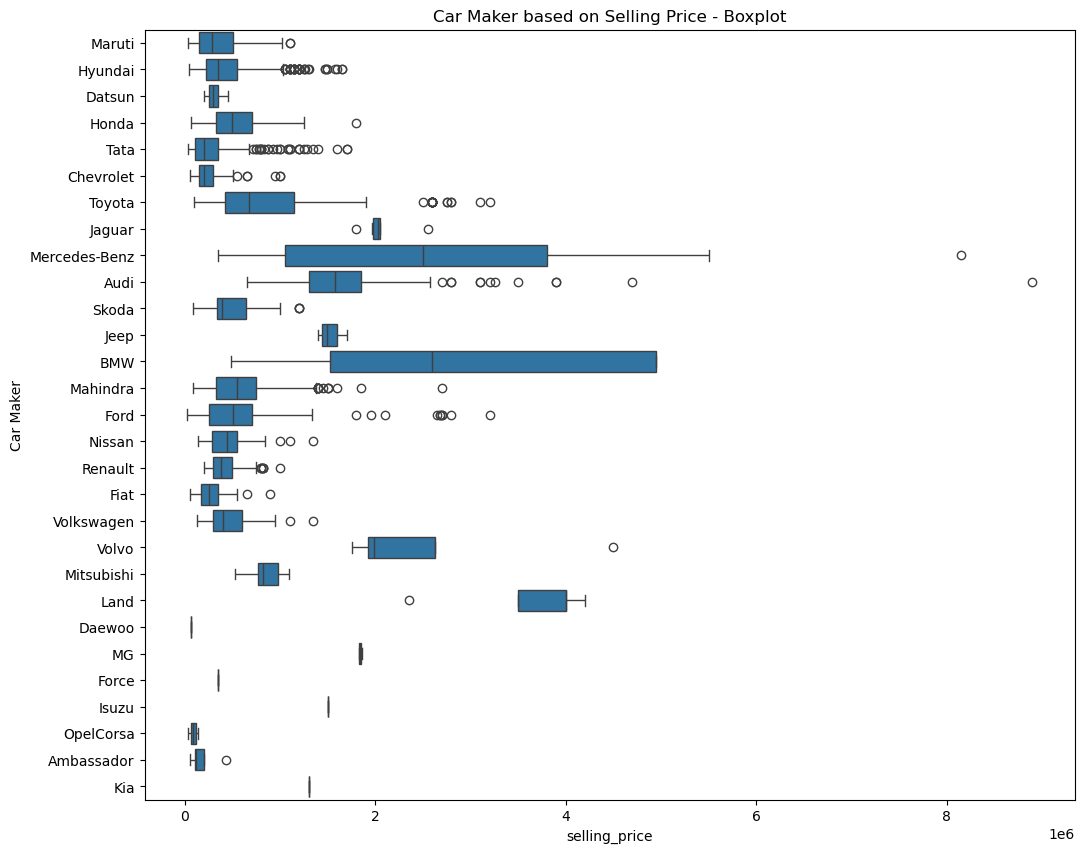

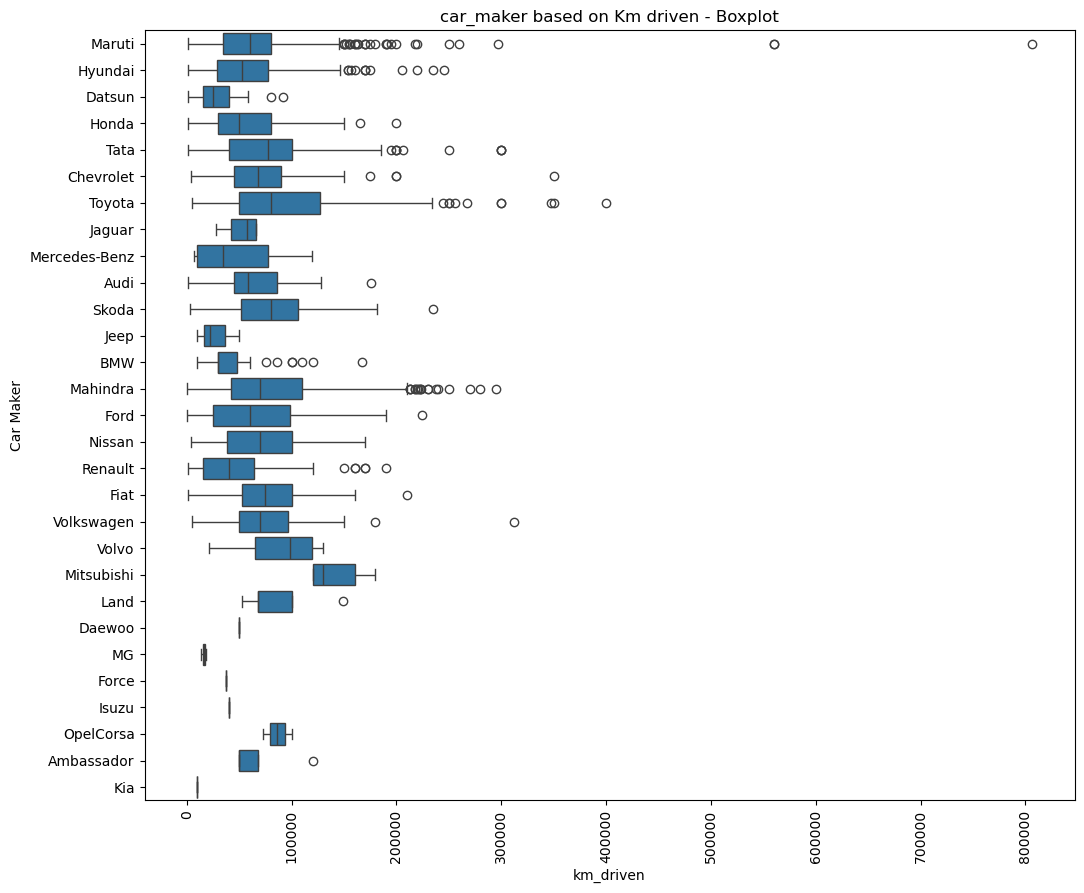

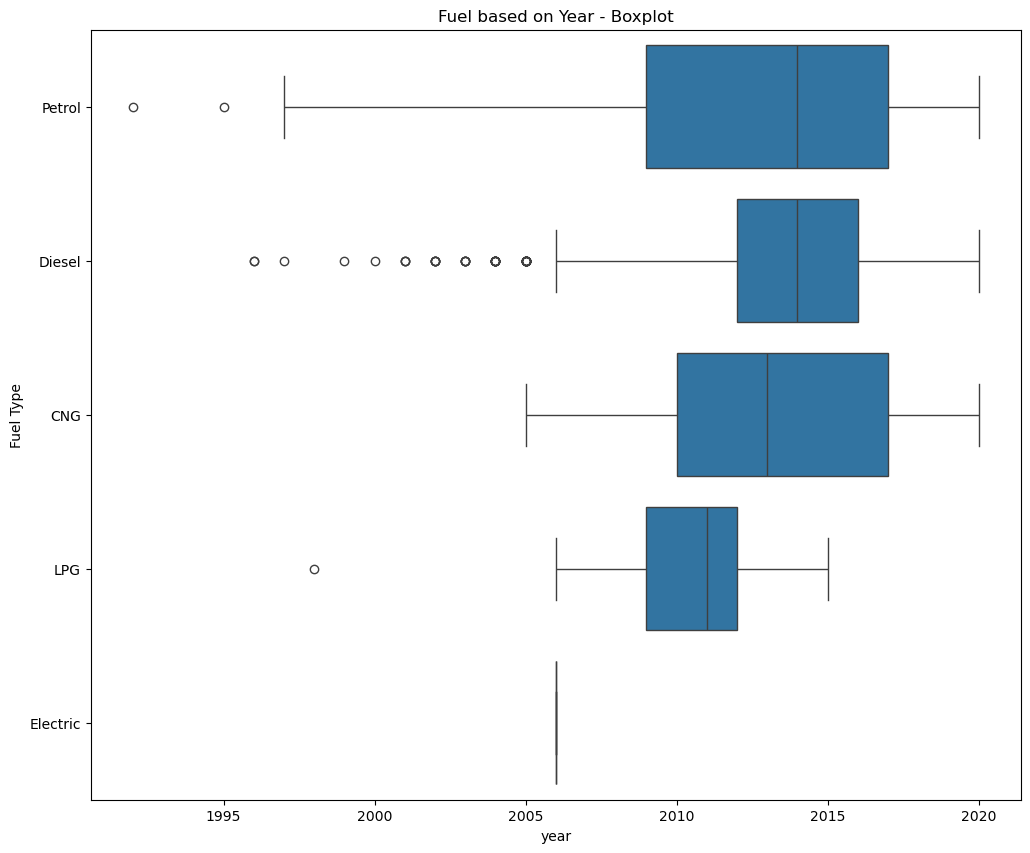

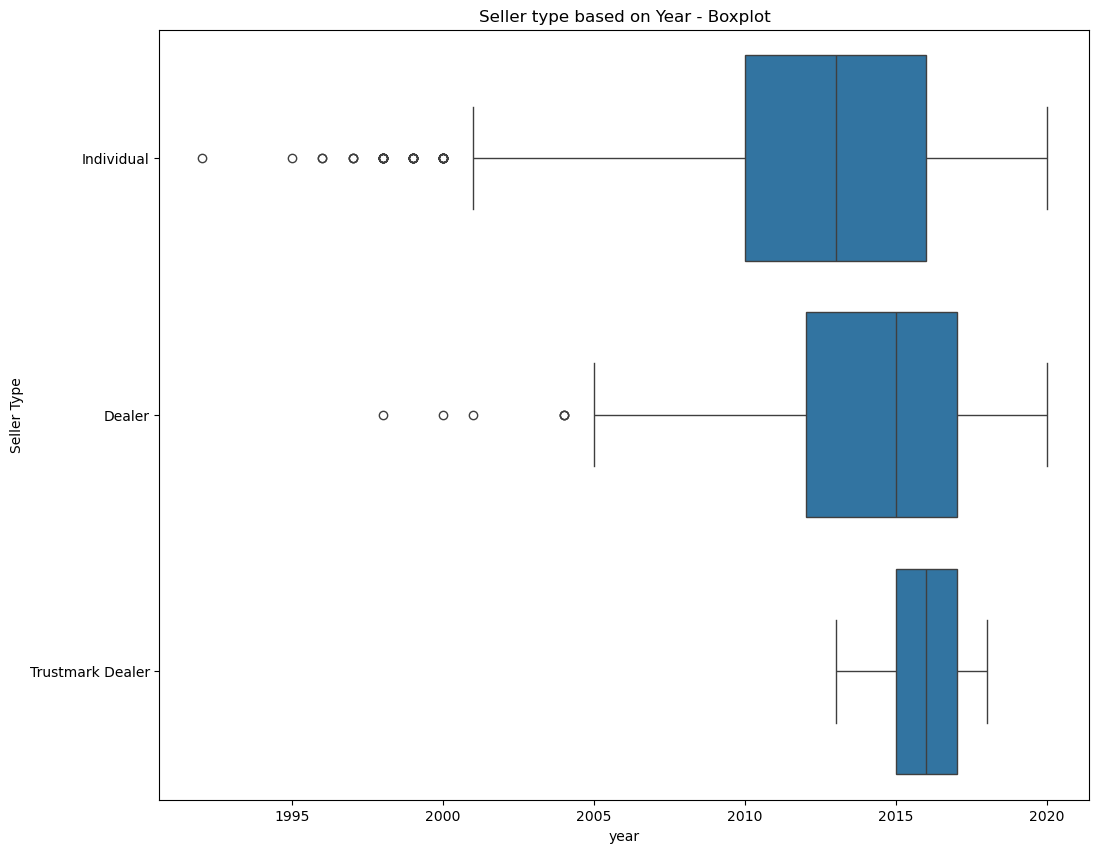

In [20]:

# Boxplot

print(cat_col)
print(num_col)

plt.figure(figsize = (12,10))
sns.boxplot(y = df["car_maker"], x = df.selling_price)
plt.ylabel("Car Maker")
plt.title("Car Maker based on Selling Price - Boxplot")
plt.show()

plt.figure(figsize = (12,10))
sns.boxplot(x = df.km_driven, y = df["car_maker"])
plt.ylabel("Car Maker")
plt.title("car_maker based on Km driven - Boxplot")
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize = (12,10))
sns.boxplot(x = df["year"], y = df.fuel)
plt.ylabel("Fuel Type")
plt.title("Fuel based on Year - Boxplot")
plt.show()

plt.figure(figsize = (12,10))
sns.boxplot(x = df["year"], y = df.seller_type)
plt.ylabel("Seller Type")
plt.title("Seller type based on Year - Boxplot")
plt.show()


Index(['fuel', 'seller_type', 'transmission', 'owner', 'car_maker',
       'car_model'],
      dtype='object')
Index(['year', 'selling_price', 'km_driven', 'no_of_total_years'], dtype='object')


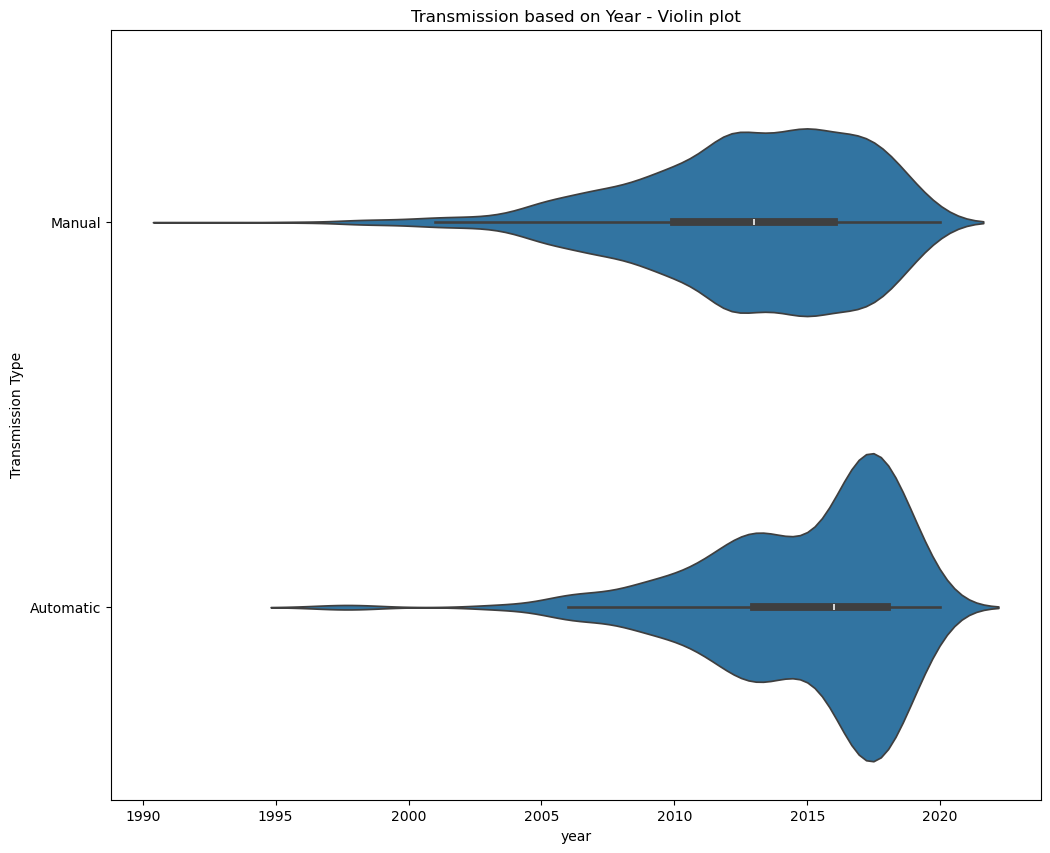

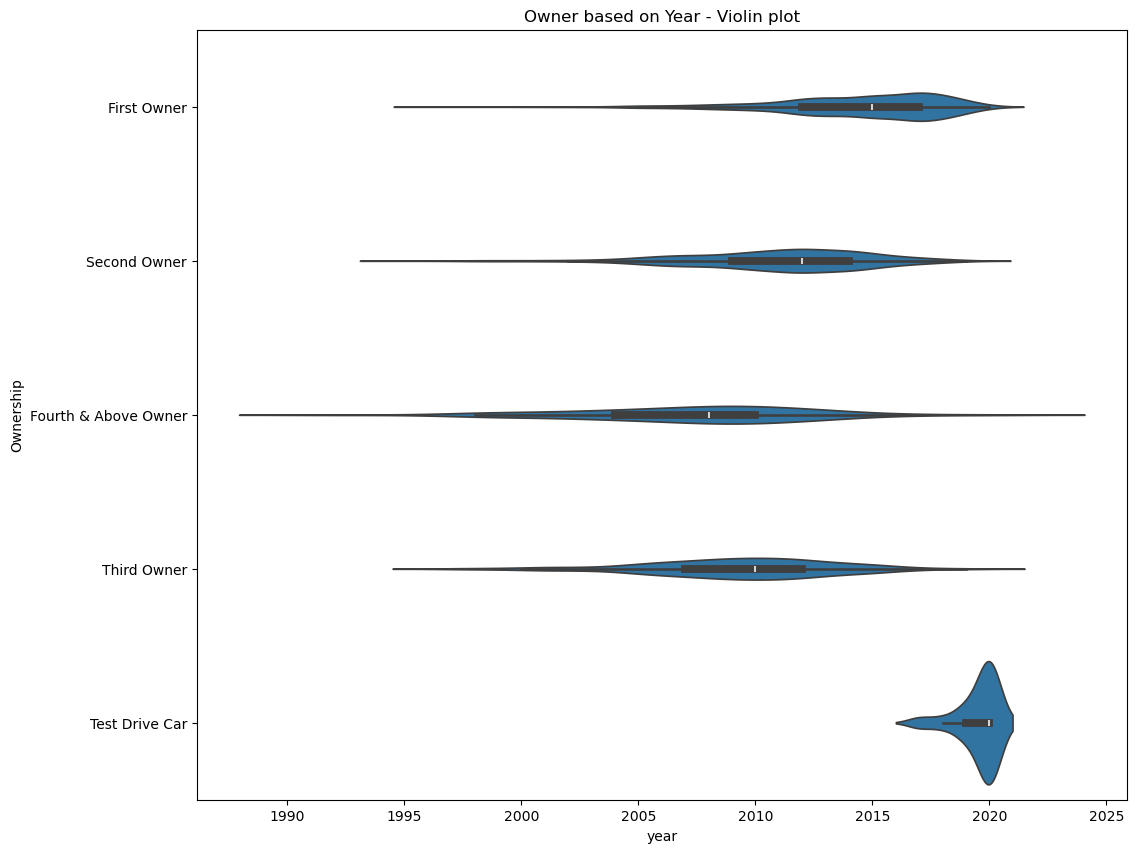

In [21]:
# Violin Plot


print(cat_col)
print(num_col)

plt.figure(figsize = (12,10))
sns.violinplot(x = df["year"], y = df.transmission)
plt.ylabel("Transmission Type")
plt.title("Transmission based on Year - Violin plot")
plt.show()

plt.figure(figsize = (12,10))
sns.violinplot(x = df["year"], y = df.owner)
plt.ylabel("Ownership")
plt.title("Owner based on Year - Violin plot")
plt.show()


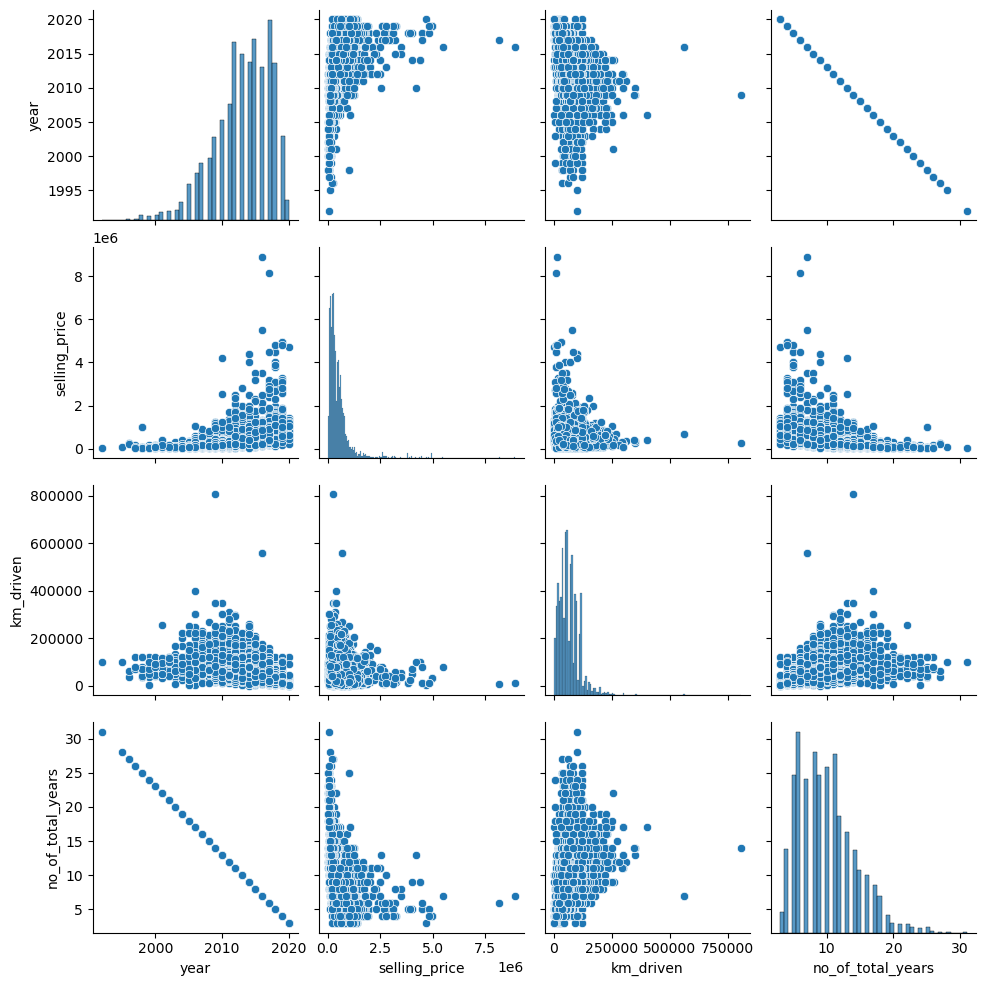

In [22]:
# Pair plots of Numerical Columns 


df.columns

sns.pairplot(data = df, vars = ['year', 'selling_price', 'km_driven', "no_of_total_years"])
plt.show()


In [24]:
# Correlation on Heatmap

corr = df.corr()
corr

sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.title("Correlation of Numerical columns")
plt.show()

In [25]:
# It can seen that there is negative or positive correlation between these columns. So, It is okay to be negative or positive correlation but it is not okay to be zero correlation"""

df.drop("year", axis = 1, inplace = True)


In [26]:
# Encoding the Data (Data Preprocessing)

# Make a copy of dataframe


# Make a copy of dataframe
df1 = df.copy()
df1.head()

df1.shape

(4340, 9)

In [27]:
# Encoding data with get dummies

# Encoding data with get dummies
df1 = pd.get_dummies(df1, drop_first=True, columns = ["car_maker", "car_model"])
df1.head()

# Checking the shape of the encoded data
df1.shape

# Checking the datatypes of the encoded data
df1.dtypes


selling_price         int64
km_driven             int64
fuel                 object
seller_type          object
transmission         object
                      ...  
car_model_Zen          bool
car_model_Zest         bool
car_model_i10          bool
car_model_i20          bool
car_model_redi-GO      bool
Length: 219, dtype: object

In [28]:
# Importing the libraries for encoding
from sklearn.preprocessing import LabelEncoder

# Check the columns which we want to encode

# Check the columns which we want to encode
cat_col


Index(['fuel', 'seller_type', 'transmission', 'owner', 'car_maker',
       'car_model'],
      dtype='object')

In [29]:
# Creating an object of LabelEncoder
le = LabelEncoder()

In [30]:
# Creating a for loop for Encoding multiple columns
encoded_columns = ['fuel', 'seller_type', 'transmission', 'owner']

for i in encoded_columns:
  df1[i] = le.fit_transform(df1[i])


df1.head()


,selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_total_years,car_maker_Audi,car_maker_BMW,car_maker_Chevrolet,...,car_model_Xcent,car_model_Xenon,car_model_Xylo,car_model_Yaris,car_model_Yeti,car_model_Zen,car_model_Zest,car_model_i10,car_model_i20,car_model_redi-GO
0,60000,70000,4,1,1,0,16,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,135000,50000,4,1,1,0,16,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,600000,100000,1,1,1,0,11,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,250000,46000,4,1,1,0,6,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,450000,141000,1,1,1,2,9,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:

# Selecting the x (Dependent variable) and the y (Independent variable)

x = df1.drop("selling_price", axis = 1)
y = df1.selling_price
print(x.shape)
print(y.shape)

(4340, 218)
(4340,)


In [32]:
# Importing Libraries for splitting data into Training and Testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .20, random_state = 0)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)


(3472, 218)
(868, 218)
(3472,)
(868,)


In [33]:
# we can check our Test data is correct
4340*.25

1085.0

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [35]:
# Creating functions for evaluating scores
def scores(ytest, ypred):
  mae = mean_absolute_error(ytest, ypred)
  mse = mean_squared_error(ytest, ypred)
  rmse = np.sqrt(mean_squared_error(ytest, ypred))
  r2 = r2_score(ytest, ypred)
  print("MAE: ", mae)
  print("MSE: ", mse)
  print("RMSE: ", rmse)
  print("R2 Score: ", r2)

def model_score(model):
  print("Training Score: ", model.score(xtrain, ytrain))
  print("Testing Score: ", model.score(xtest, ytest))

def adjusted_r2_score(ytest, y_pred, n_features):
    r_squared = r2_score(ytest, y_pred)
    adjusted_r_squared = 1 - (1 - r_squared) * (len(ytest) - 1) / (len(ytest) - n_features - 1)
    print("Adjusted R2 Score: ", adjusted_r_squared)


In [36]:

# Importing the ML Regression Libraries

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier, BaggingRegressor

In [37]:
# 1) Linear Regression

lr = LinearRegression()
lr.fit(xtrain, ytrain)


LinearRegression()

In [38]:
# Checking the Training Score and Testing Score

model_score(lr)


Training Score:  0.8994430637346355
Testing Score:  0.8608162826447747


In [39]:
# Generate the predictions

ypred_lr = lr.predict(xtest)
ypred_lr

array([ 6.63321962e+05,  1.60047293e+06,  1.64076676e+05,  4.95000000e+06,
        7.28839553e+04,  2.56965022e+05,  4.35304869e+05,  3.00672394e+05,
        1.04803775e+06,  3.88486053e+05,  4.84966362e+05,  7.37275922e+05,
        7.66297796e+05,  3.01125187e+05,  1.32999401e+05,  5.45003508e+05,
        4.49869631e+05,  3.47812462e+05,  1.33329167e+05,  7.29400744e+05,
       -1.68815012e+05,  4.04077020e+05,  3.98054612e+05,  3.51778155e+05,
        4.37727505e+05,  5.63458180e+05,  5.82084443e+05,  7.20713002e+05,
        5.45743774e+05,  3.08286727e+05,  5.87246544e+05,  3.68502142e+05,
        9.05853339e+05,  7.55322513e+05,  2.13904202e+05,  1.96796093e+05,
        1.75942832e+05,  1.92379062e+05,  1.34536495e+05,  5.30290686e+05,
        2.04116027e+05,  6.15018509e+05,  4.00272222e+05,  1.72136274e+06,
        5.70170450e+05,  4.17987582e+05, -3.33775260e+04,  3.00971783e+05,
        9.27762856e+05,  1.37450497e+05,  3.73024394e+04,  4.62733397e+05,
        5.74390542e+05,  

In [40]:

# Checking the Scores of our model

scores(ytest, ypred_lr)

adjusted_r2_score(ytest, ypred_lr, (df1.shape[1]-1))


MAE:  122205.09747518318
MSE:  51686040840.67879
RMSE:  227345.6417894981
R2 Score:  0.8608162826447747
Adjusted R2 Score:  0.8140642789722954


In [41]:
# 2) Ridge Regression

rr = Ridge(alpha=25)
rr.fit(xtrain, ytrain)

Ridge(alpha=25)

In [42]:
# Checking the Training Score and Testing Score

model_score(rr)

Training Score:  0.6898270959969879
Testing Score:  0.7619278557545841


In [43]:
# Generate the predictions

ypred_rr = rr.predict(xtest)
ypred_rr


array([1012312.53789292, 1660117.18932279,  207597.8625935 ,
       2866610.70038882,  283225.16971451,  260231.7919808 ,
        784628.70238903,  310427.13916749, 1287169.00767226,
        442059.4524735 ,  435610.81736359,  574867.23142092,
       1037006.5109426 ,  500911.17314123,   92370.41533781,
        464709.69317135,  508077.20607875,  397920.61063257,
         30392.47074286,  706589.9919336 , -230204.87141164,
        474608.41715838,  437508.64057855,  446625.74229419,
        739745.04075665,  873999.72626517,  582222.54517768,
        696664.13618114,  484847.04465166,  382072.83755855,
        539311.23477271,  442642.18335137,  871099.22721168,
        765048.93304346,  211228.92851158,  327365.59770434,
        278231.69501963,  149618.27352958,  106411.11883046,
        487267.30097014,  242151.24669838,  664443.60279443,
        408404.61266114, 2047790.84480963,  523915.34550499,
        400372.79000471,  -64863.95715649,  314882.96140467,
        900309.34196136,

In [44]:
# Checking the Scores of our model 

scores(ytest, ypred_rr)

adjusted_r2_score(ytest, ypred_rr, (df1.shape[1]-1))

MAE:  172346.01351463533
MSE:  88408377102.70122
RMSE:  297335.4622353365
R2 Score:  0.7619278557545841
Adjusted R2 Score:  0.6819590923562779


In [45]:
# 3) Lasso Regression

lar = Lasso(alpha=0.1)
lar.fit(xtrain, ytrain)

C:\Users\somdev sheel\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.682e+13, tolerance: 1.129e+11
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [46]:
"""Checking the Training Score and Testing Score"""

model_score(lar)

Training Score:  0.8994156870887056
Testing Score:  0.8616310793617794


In [47]:

"""Generate the predictions"""

ypred_lar = lar.predict(xtest)
ypred_lar

array([ 6.63427203e+05,  1.60051094e+06,  1.64240715e+05,  4.94994881e+06,
        7.29865033e+04,  2.56872445e+05,  4.35376849e+05,  3.00639441e+05,
        1.04806574e+06,  3.88414107e+05,  4.85129273e+05,  7.37259269e+05,
        7.66269512e+05,  3.01262330e+05,  1.33050201e+05,  5.44840373e+05,
        4.49751934e+05,  3.47829590e+05,  1.33524193e+05,  7.29272859e+05,
       -1.68760384e+05,  4.04120199e+05,  3.98003939e+05,  3.51755896e+05,
        4.37739712e+05,  5.63561325e+05,  5.81938378e+05,  7.20600452e+05,
        5.45329308e+05,  3.08265862e+05,  5.87195436e+05,  3.68500182e+05,
        9.05857990e+05,  7.55240671e+05,  2.13972449e+05,  1.96787309e+05,
        1.75955463e+05,  1.92348865e+05,  1.34610707e+05,  5.30337103e+05,
        2.04110387e+05,  6.15004325e+05,  4.00417438e+05,  1.72150696e+06,
        5.70086887e+05,  4.17910868e+05, -3.33199067e+04,  3.00875707e+05,
        9.27718193e+05,  1.37584203e+05,  3.73694281e+04,  4.62736566e+05,
        5.74212637e+05,  

In [48]:
"""Checking the Scores of our model"""

scores(ytest, ypred_lar)

adjusted_r2_score(ytest, ypred_lar, (df1.shape[1]-1))


MAE:  121976.45956800679
MSE:  51383465099.836426
RMSE:  226679.21188286415
R2 Score:  0.8616310793617794
Adjusted R2 Score:  0.8151527670364603


In [49]:
"""### **4) KNeighborsRegressor**"""

knn = KNeighborsRegressor(n_neighbors = 15)
knn.fit(xtrain, ytrain)


KNeighborsRegressor(n_neighbors=15)

In [50]:
"""Checking the Training Score and Testing Score"""

model_score(knn)


Training Score:  0.39287253371723774
Testing Score:  0.4794789301896937


In [51]:
"""Generate the predictions"""

ypred_knn = knn.predict(xtest)
ypred_knn


array([ 361000.        , 1188000.        ,  393200.        ,
       2843333.33333333,  300666.66666667,  190879.93333333,
        612599.93333333,  295200.        ,  360733.13333333,
        546400.        ,  416666.4       ,  440199.8       ,
        616533.2       ,  558866.66666667,  131533.33333333,
        572000.        ,  481466.66666667,  284666.66666667,
        103533.33333333,  559333.33333333,   78066.66666667,
        413333.26666667,  555333.33333333,  376133.26666667,
        337400.        ,  555333.33333333,  560000.        ,
        590133.13333333,  587066.6       ,  444466.66666667,
        470066.66666667,  462666.6       ,  400333.26666667,
        691800.        ,  329666.6       ,  379866.66666667,
        226733.26666667,  415466.66666667,  146333.33333333,
        397933.33333333,  200000.        ,  456333.26666667,
        516599.86666667,  492333.33333333,  541000.        ,
        226666.6       ,  129333.26666667,  314693.2       ,
        435999.93333333,

In [52]:

"""Checking the Scores of our model"""

scores(ytest, ypred_knn)

adjusted_r2_score(ytest, ypred_knn, (df1.shape[1]-1))

MAE:  247751.9599078341
MSE:  193296125321.79785
RMSE:  439654.55225869984
R2 Score:  0.4794789301896937
Adjusted R2 Score:  0.3046351810084197


In [53]:
#5) Decision Tree Regression

dtr = DecisionTreeRegressor(random_state = 7, max_depth=4)
dtr.fit(xtrain, ytrain)


DecisionTreeRegressor(max_depth=4, random_state=7)

In [54]:
"""Checking the Training Score and Testing Score"""

model_score(dtr)

Training Score:  0.67384854955098
Testing Score:  0.6566667814616864


In [55]:
"""Generate the predictions"""

ypred_dtr = dtr.predict(xtest)
ypred_dtr

array([1162219.17808219, 1162219.17808219,  401169.09665428,
       3767076.88461538,  158035.54075032,  307944.22005208,
        640292.95541401,  401169.09665428, 1913797.28378378,
        401169.09665428,  482692.23076923,  401169.09665428,
        640292.95541401,  567092.06578947,  158035.54075032,
        557614.18274112,  557614.18274112,  307944.22005208,
        158035.54075032,  567092.06578947,  158035.54075032,
        567092.06578947,  307944.22005208,  567092.06578947,
       1162219.17808219,  640292.95541401,  557614.18274112,
        567092.06578947,  557614.18274112,  401169.09665428,
        401169.09665428,  401169.09665428,  567092.06578947,
        810703.33944954,  401169.09665428,  307944.22005208,
        401169.09665428,  158035.54075032,  158035.54075032,
        307944.22005208,  158035.54075032,  567092.06578947,
        307944.22005208, 2089347.82608696,  401169.09665428,
        307944.22005208,  158035.54075032,  401169.09665428,
        567092.06578947,

In [56]:
"""Checking the Scores of our model"""

scores(ytest, ypred_dtr)

adjusted_r2_score(ytest, ypred_dtr, (df1.shape[1]-1))

MAE:  200135.23731176922
MSE:  127497203642.3107
RMSE:  357067.5057216922
R2 Score:  0.6566667814616864
Adjusted R2 Score:  0.5413406772377228


In [57]:
#6) Bagging Regressor with Decision Tree Regression

bag_dtr = BaggingRegressor(estimator = dtr, n_estimators = 15,
                              max_samples = xtrain.shape[0],
                            max_features = xtrain.shape[1],
                           random_state = 7)
bag_dtr.fit(xtrain, ytrain)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=4, random_state=7),
                 max_features=218, max_samples=3472, n_estimators=15,
                 random_state=7)

In [58]:

"""Checking the Training Score and Testing Score"""

model_score(bag_dtr)

Training Score:  0.7223461816870247
Testing Score:  0.721386014217956


In [59]:
"""Generate the predictions"""

ypred_bag_dtr = bag_dtr.predict(xtest)
ypred_bag_dtr

array([1348827.48001333, 1348827.48001333,  406934.73603353,
       4227308.50090901,  185363.70092812,  231645.60108981,
        648946.47193477,  392258.60501016, 1615144.58204531,
        406934.73603353,  461477.91782711,  406934.73603353,
        648946.47193477,  624145.30333025,  172933.83845545,
        565570.84207678,  565570.84207678,  322447.75785984,
        159801.29232736,  572265.99678964,  159801.29232736,
        572265.99678964,  322447.75785984,  572265.99678964,
       1304907.46201963,  648946.47193477,  515789.54045456,
        572265.99678964,  565570.84207678,  406934.73603353,
        406934.73603353,  406934.73603353,  572265.99678964,
        829667.75265679,  392258.60501016,  322447.75785984,
        406934.73603353,  159801.29232736,  172933.83845545,
        322447.75785984,  172933.83845545,  572265.99678964,
        322447.75785984, 1513348.75995944,  406934.73603353,
        317375.62063719,  159801.29232736,  392258.60501016,
        572265.99678964,

In [60]:

"""Checking the Scores of our model"""

scores(ytest, ypred_bag_dtr)

adjusted_r2_score(ytest, ypred_bag_dtr, (df1.shape[1]-1))


MAE:  192667.9383686697
MSE:  103463638718.32886
RMSE:  321657.64209533227
R2 Score:  0.721386014217956
Adjusted R2 Score:  0.6277991900261446


In [61]:
# 7) Bagging Regressor with Linear Regression

bag_lr = BaggingRegressor(estimator = lr, n_estimators = 15,
                              max_samples = xtrain.shape[0],
                          max_features = xtrain.shape[1],
                          random_state = 7)
bag_lr.fit(xtrain, ytrain)

BaggingRegressor(estimator=LinearRegression(), max_features=218,
                 max_samples=3472, n_estimators=15, random_state=7)

In [62]:
"""Checking the Training Score and Testing Score"""

model_score(bag_lr)


Training Score:  0.8819012441213513
Testing Score:  0.8587197814054384


In [63]:
"""Generate the predictions"""

ypred_bag_lr = bag_lr.predict(xtest)
ypred_bag_lr

array([ 6.59879088e+05,  1.60510575e+06,  1.81477910e+05,  4.95000000e+06,
        7.03002513e+04,  2.52873969e+05,  4.38655776e+05,  3.01441521e+05,
        1.04205428e+06,  3.85224481e+05,  4.71499718e+05,  7.34033151e+05,
        7.61292562e+05,  3.11178612e+05,  1.29039530e+05,  5.42328068e+05,
        4.47134142e+05,  3.42796894e+05,  1.37402542e+05,  7.37955583e+05,
       -1.73258838e+05,  3.98416060e+05,  3.98045542e+05,  3.50998016e+05,
        4.40300420e+05,  5.59917263e+05,  5.78715046e+05,  7.28951887e+05,
        5.43106234e+05,  3.05175186e+05,  5.86243558e+05,  3.64167897e+05,
        8.97316280e+05,  7.51952852e+05,  2.15713854e+05,  2.01202626e+05,
        1.72821388e+05,  1.83224552e+05,  1.34748550e+05,  5.39213030e+05,
        2.09285052e+05,  6.18415433e+05,  3.96334813e+05,  1.64785123e+06,
        5.70252746e+05,  4.13899092e+05, -3.07406199e+04,  3.03458101e+05,
        9.17532808e+05,  1.45847429e+05,  4.12209892e+04,  4.56336452e+05,
        5.70314747e+05,  

In [64]:
"""Checking the Scores of our model"""

scores(ytest, ypred_bag_lr)

adjusted_r2_score(ytest, ypred_bag_lr, (df1.shape[1]-1))

MAE:  122537.14808283551
MSE:  52464579097.43705
RMSE:  229051.47695973725
R2 Score:  0.8587197814054384
Adjusted R2 Score:  0.8112635600593452


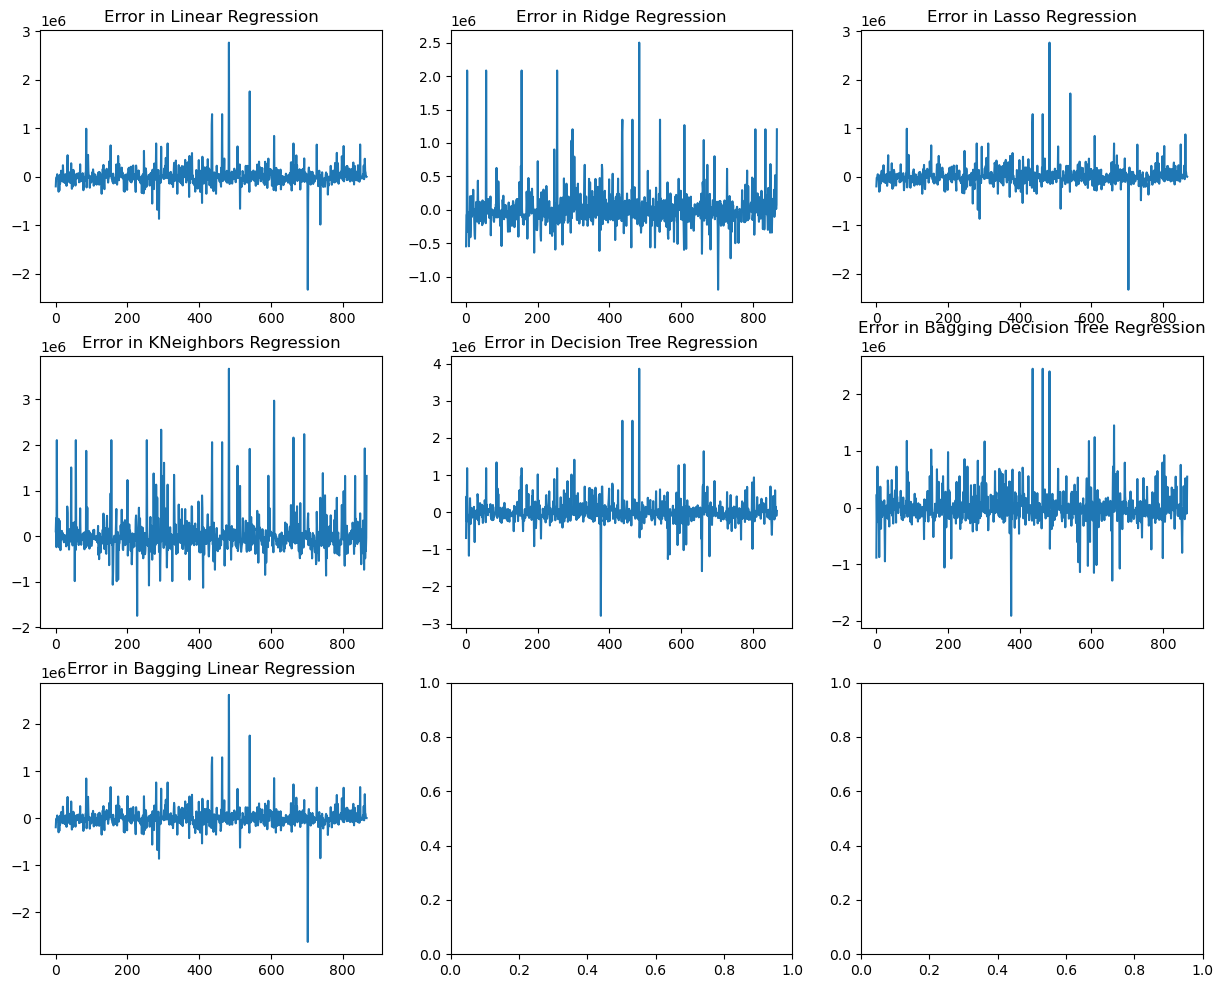

In [65]:
# Creating variables for plotting errors
error_lr = [i for i in range(len(ypred_lr))]
error_rr = [i for i in range(len(ypred_rr))]
error_lar = [i for i in range(len(ypred_lar))]
error_knn = [i for i in range(len(ypred_knn))]
error_dtr = [i for i in range(len(ypred_dtr))]
error_bag_dtr = [i for i in range(len(ypred_bag_dtr))]
error_bag_lr = [i for i in range(len(ypred_bag_lr))]

figure, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize = (15,12))

ax1.plot(error_lr, ytest-ypred_lr)
ax1.set_title("Error in Linear Regression")

ax2.plot(error_rr, ytest-ypred_rr)
ax2.set_title("Error in Ridge Regression")

ax3.plot(error_lar, ytest-ypred_lar)
ax3.set_title("Error in Lasso Regression")

ax4.plot(error_knn, ytest-ypred_knn)
ax4.set_title("Error in KNeighbors Regression")

ax5.plot(error_dtr, ytest-ypred_dtr)
ax5.set_title("Error in Decision Tree Regression")

ax6.plot(error_bag_dtr, ytest-ypred_bag_dtr)
ax6.set_title("Error in Bagging Decision Tree Regression")

ax7.plot(error_bag_lr, ytest-ypred_bag_lr)
ax7.set_title("Error in Bagging Linear Regression")


plt.show()


In [66]:
# Creating Dataframe of Models Score

all_model = {"Linear Reg":[mean_absolute_error(ytest, ypred_lr), mean_squared_error(ytest, ypred_lr), np.sqrt(mean_squared_error(ytest, ypred_lr)), r2_score(ytest, ypred_lr), 0.8140642789717978],
             "Ridge Reg":[mean_absolute_error(ytest, ypred_rr), mean_squared_error(ytest, ypred_rr), np.sqrt(mean_squared_error(ytest, ypred_rr)), r2_score(ytest, ypred_rr), 0.6819590923562783],
             "Lasso Reg":[mean_absolute_error(ytest, ypred_lar), mean_squared_error(ytest, ypred_lar), np.sqrt(mean_squared_error(ytest, ypred_lar)), r2_score(ytest, ypred_lar), 0.8151527670364602],
             "KNeighbors Reg":[mean_absolute_error(ytest, ypred_knn), mean_squared_error(ytest, ypred_knn), np.sqrt(mean_squared_error(ytest, ypred_knn)), r2_score(ytest, ypred_knn), 0.3046351810084197],
             "Decision Tree Reg":[mean_absolute_error(ytest, ypred_dtr), mean_squared_error(ytest, ypred_dtr), np.sqrt(mean_squared_error(ytest, ypred_dtr)), r2_score(ytest, ypred_dtr), 0.5413406772377228],
             "Bagging with Decision Tree Reg":[mean_absolute_error(ytest, ypred_bag_dtr), mean_squared_error(ytest, ypred_bag_dtr), np.sqrt(mean_squared_error(ytest, ypred_bag_dtr)), r2_score(ytest, ypred_bag_dtr), 0.6277991900261446],
             "Bagging with Linear Reg":[mean_absolute_error(ytest, ypred_bag_lr), mean_squared_error(ytest, ypred_bag_lr), np.sqrt(mean_squared_error(ytest, ypred_bag_lr)), r2_score(ytest, ypred_bag_lr), 0.8112635600586408]}

res = pd.DataFrame(all_model, index = ["MAE", "MSE", "RMSE", "R2 Score", "Adjusted R2 Score"])
res

,Linear Reg,Ridge Reg,Lasso Reg,KNeighbors Reg,Decision Tree Reg,Bagging with Decision Tree Reg,Bagging with Linear Reg
MAE,1.222051e+05,1.723460e+05,1.219765e+05,2.477520e+05,2.001352e+05,1.926679e+05,1.225371e+05
MSE,5.168604e+10,8.840838e+10,5.138347e+10,1.932961e+11,1.274972e+11,1.034636e+11,5.246458e+10
RMSE,2.273456e+05,2.973355e+05,2.266792e+05,4.396546e+05,3.570675e+05,3.216576e+05,2.290515e+05
R2 Score,8.608163e-01,7.619279e-01,8.616311e-01,4.794789e-01,6.566668e-01,7.213860e-01,8.587198e-01
Adjusted R2 Score,8.140643e-01,6.819591e-01,8.151528e-01,3.046352e-01,5.413407e-01,6.277992e-01,8.112636e-01


In [67]:
# Lasso Regression is the best model based on Scores

# Final model (Lasso Regression) based on Evaluation


model = Lasso(alpha=0.1)
model.fit(x, y)


C:\Users\somdev sheel\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.483e+13, tolerance: 1.452e+11
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [68]:

#Generate predictions for best model

ypred = model.predict(x)
ypred


array([171088.78161059,  75742.40252362, 479826.2923621 , ...,
       224072.75283174, 853629.23508762, 240462.58934492])

In [69]:
"""#### **Checking Scores for our best model**"""

scores(y, ypred)

model_score(model)

adjusted_r2_score(y, ypred, (df1.shape[1]-1))

MAE:  108579.73652164939
MSE:  34467149920.54538
RMSE:  185653.30570863903
R2 Score:  0.89700276781293
Training Score:  0.896556379103031
Testing Score:  0.8983571922676107
Adjusted R2 Score:  0.8915542367241697


In [70]:
# Importing Pickle Library for Saving and Loading Model

import pickle

# Saving the best model using Pickle

pickle.dump(model,open('best_model.pkl','wb'))

In [71]:
# Collecting 20 Datapoints randomly from our dataset

df_20 = df1.sample(20)
df_20.head()

# Saving the Sample Dataset
df_20.to_csv("sample_dataset.csv")

In [72]:
# Selecting Dependent and Independent Variable for randomly 20 points selecting dataset

x_20 = df_20.drop("selling_price", axis = 1)
y_20 = df_20["selling_price"]
print(x.shape)
print(y.shape)

(4340, 218)
(4340,)


In [73]:
# Splitting the data into Training and Testing for randomly 20 points selecting dataset

xtrain_20, xtest_20, ytrain_20, ytest_20 = train_test_split(x, y, test_size = .25)
print(xtrain_20.shape)
print(ytrain_20.shape)
print(xtest_20.shape)
print(ytest_20.shape)

(3255, 218)
(3255,)
(1085, 218)
(1085,)


In [75]:
# Loading the best model using Pickle

# Load the saved trained ML model
best_model_20 = pickle.load(open("best_model.pkl", "rb"))
best_model_20

Lasso(alpha=0.1)

In [76]:
# Generate the Predictions for randomly 20 points selecting dataset

ypred_20 = best_model_20.predict(xtest_20)
ypred_20

array([312698.94918236,  94755.67433167, 797357.27109779, ...,
       291400.40536537, 147716.05563251, 605945.23097352])

In [77]:
# Checking the Scores for randomly 20 points selecting dataset

model_score(best_model_20)

scores(ytest_20, ypred_20)

adjusted_r2_score(ytest_20, ypred_20, (df_20.shape[1]-1))


Training Score:  0.896556379103031
Testing Score:  0.8983571922676107
MAE:  111978.36026848544
MSE:  40339313116.21568
RMSE:  200846.4914212237
R2 Score:  0.8691662953798297
Adjusted R2 Score:  0.8362312519535051


In [78]:
# Making Pipelines

# Importing Libraries for Pipelines


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso

In [79]:
# Extract Categorical Columns
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'car_maker', 'car_model']

# Splitting data into Training and Testing

X = df.drop("selling_price", axis = 1)
Y = df["selling_price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.35, random_state=7)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2821, 8)
(2821,)
(1519, 8)
(1519,)


In [80]:
# One Hot Encoding
preprocessor = ColumnTransformer([
    ("OneHotEncoding", OneHotEncoder(sparse = False, handle_unknown = "ignore"), categorical_cols)
    ], remainder = "passthrough")


In [81]:
# Create Pipeline Object with best fit model
lasso = Lasso(alpha = 0.1, max_iter = 1000)
pipeline = Pipeline(steps = [("Preprocessor", preprocessor), ("model", lasso)], verbose = True)
pipeline


Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['fuel', 'seller_type',
                                                   'transmission', 'owner',
                                                   'car_maker',
                                                   'car_model'])])),
                ('model', Lasso(alpha=0.1))],
         verbose=True)

In [82]:
# Fitting the model
pipeline.fit(X, Y)

C:\Users\somdev sheel\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[Pipeline] ...... (step 1 of 2) Processing Preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=  34.6s


C:\Users\somdev sheel\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.352e+13, tolerance: 1.452e+11
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['fuel', 'seller_type',
                                                   'transmission', 'owner',
                                                   'car_maker',
                                                   'car_model'])])),
                ('model', Lasso(alpha=0.1))],
         verbose=True)

In [83]:
# Generate the predictions
pipe_pred = pipeline.predict(X_test)
pipe_pred

array([195721.42033842, 441119.12711336, 203299.7129238 , ...,
       563627.13114855, 691000.16960373, 623726.42955818])

In [84]:
# Checking the R2 Score
r2_score(Y_test, pipe_pred)

0.8923778267591793

In [85]:
# Checking the Adjusted R2 Score
adjusted_r2_score(Y_test, pipe_pred, (df.shape[1]-1))

Adjusted R2 Score:  0.8918076430598902


In [86]:

# Saving the pipeline model for using in Web App

pickle.dump(pipeline,open('pipeline_model.pkl','wb'))